# Exploratory Data Analysis
--In Statistics, "Exploratory Data Analysis" (EDA) is a approach to analyzing datasets to summarize their main characteristics,     often with visual methods.

--A statistical model can be used or not, but primarily EDA is for seeing "What the data can tell us beyond the formal modelling   or hypothesis testing task".

--Exploratory data analysis was promoted by "John Tukey" to encourage statisticians to explore the data and possibly formulate hypothesis that could lead to new data collection and experiments.

--Here,the problem statement is DO EDA to analyze the "CARS.CSV" dataset.


In [1]:
import os #libraries
import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing the cars dataset
#here dataframe by the name 'cars' is created
cars=pd.read_csv("D:/ds datatechs/datasets/CARS.csv")

In [3]:
#Display top 5 records
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
#Display how many rows and columns in dataset
#(a,b) a-rows b-cols
cars.shape

(429, 15)

In [5]:
#Dataset information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         429 non-null    object 
 1   Model        429 non-null    object 
 2   Type         429 non-null    object 
 3   Origin       429 non-null    object 
 4   DriveTrain   429 non-null    object 
 5   MSRP         429 non-null    object 
 6   Invoice      429 non-null    object 
 7   EngineSize   429 non-null    float64
 8   Cylinders    427 non-null    float64
 9   Horsepower   429 non-null    int64  
 10  MPG_City     429 non-null    int64  
 11  MPG_Highway  429 non-null    int64  
 12  Weight       429 non-null    int64  
 13  Wheelbase    429 non-null    int64  
 14  Length       429 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.4+ KB


In [6]:
#Display which column has how many missing values/null values
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
#Remove unimportant columns:MSRP AND INVOICE
cars=cars.drop(['MSRP','Invoice'], axis=1)

In [9]:
#here the data with drop column 
cars.head()

,Make,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197


In [13]:
#remove duplicate rows if any 
#keep the first row and remove other duplicate rows of that row
cars=cars.drop_duplicates(keep='first')


In [14]:
#remove the rows having missing values(in cylinders)
cars.dropna(inplace=True)

In [15]:
#shape of the dataset-no. of rows and columns (429,15) without drop 
cars.shape

(426, 13)

In [16]:
#summary statistics
#if std is 0, that column should be removed from analysis 
cars.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [17]:
#remove any space in column names
cars.columns=cars.columns.str.replace('',"")

In [18]:
#sort the data with respect a column--here we sort on "MPG_City"
cars_sort=cars.sort_values(by='MPG_City', ascending=False)
cars_sort.head()

,Make,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,1.5,4.0,110,59,51,2890,106,175
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,1.4,4.0,93,46,51,2732,103,175
404,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,1.9,4.0,100,38,46,3003,99,172
155,Honda,Civic HX 2dr,Sedan,Asia,Front,1.7,4.0,117,36,44,2500,103,175


In [19]:
#iloc[]- Gives integer location based indexing/selection
#select first 10 rows in "MPG_City" column
x=cars.iloc[0:10,8]
x
#here 8 is the column no. in dataset and [0:10] is indexing.

0    17
1    24
2    22
3    20
4    18
5    18
6    17
7    22
8    23
9    20
Name: MPG_City, dtype: int64

(array([ 31., 193., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

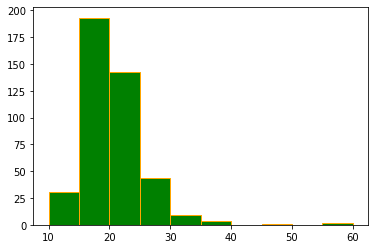

In [20]:
#Draw histogram for"MPG_City" in the intervals of 10---using matplotlib
num_bins=10
plt.hist(cars['MPG_City'], num_bins, color="green", edgecolor="orange")

C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG_City', ylabel='Density'>

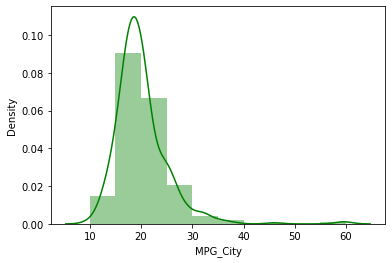

In [22]:
#Probability Density Function ----represents values in 0 to 1 range 
#Use Seaborn--to give a tuple to the cars array.
sns.distplot(cars[('MPG_City')], bins=10, color="green")

(array([  3.,  17.,  35.,  98., 120.,  78.,  51.,  13.,   9.,   2.]),
 array([143. , 152.5, 162. , 171.5, 181. , 190.5, 200. , 209.5, 219. ,
        228.5, 238. ]),
 <BarContainer object of 10 artists>)

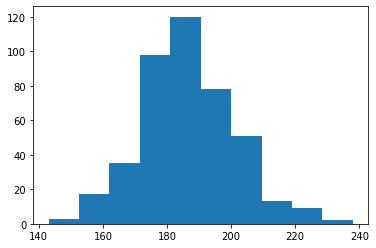

In [23]:
#Draw histogram for "Length" in the intervals of 10
num_bins=10
plt.hist(cars[('Length')], num_bins)

C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

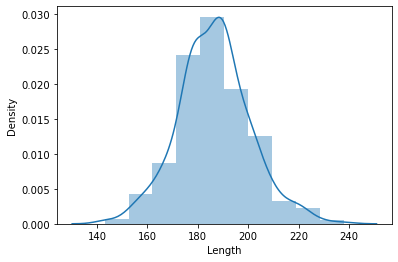

In [24]:
#Probability Density Function for 'Length'
sns.distplot(cars[('Length')], bins=10)

In [25]:
#To select only numeric type columns, we can give their names or datatype as:
cars[['EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway','Weight','Wheelbase','Length']]

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,6.0,265,17,23,4451,106,189
1,2.0,4.0,200,24,31,2778,101,172
2,2.4,4.0,200,22,29,3230,105,183
3,3.2,6.0,270,20,28,3575,108,186
4,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186
424,2.3,5.0,242,20,26,3450,105,186
425,2.9,6.0,268,19,26,3653,110,190
426,1.9,4.0,170,22,29,2822,101,180


In [27]:
cars_num=cars.select_dtypes(include=['float64','int64'])
cars_num

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,6.0,265,17,23,4451,106,189
1,2.0,4.0,200,24,31,2778,101,172
2,2.4,4.0,200,22,29,3230,105,183
3,3.2,6.0,270,20,28,3575,108,186
4,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186
424,2.3,5.0,242,20,26,3450,105,186
425,2.9,6.0,268,19,26,3653,110,190
426,1.9,4.0,170,22,29,2822,101,180


array([[<AxesSubplot:title={'center':'EngineSize'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Horsepower'}>],
       [<AxesSubplot:title={'center':'MPG_City'}>,
        <AxesSubplot:title={'center':'MPG_Highway'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Wheelbase'}>,
        <AxesSubplot:title={'center':'Length'}>, <AxesSubplot:>]],
      dtype=object)

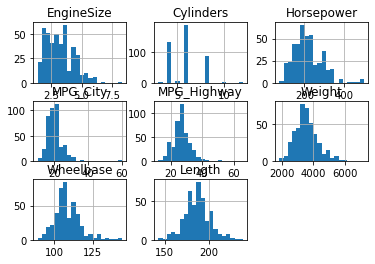

In [28]:
#Display histograms for all numeric columns
cars_num.hist(bins=20)

In [30]:
#Create correlations amomg numeric columns. method=pearson/kendall correlation with itself is 1
#negative value--if one value increases, the othe one decrease.
cars_num.corr(method='pearson')#correlation amomg all numeric columns

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Python39\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

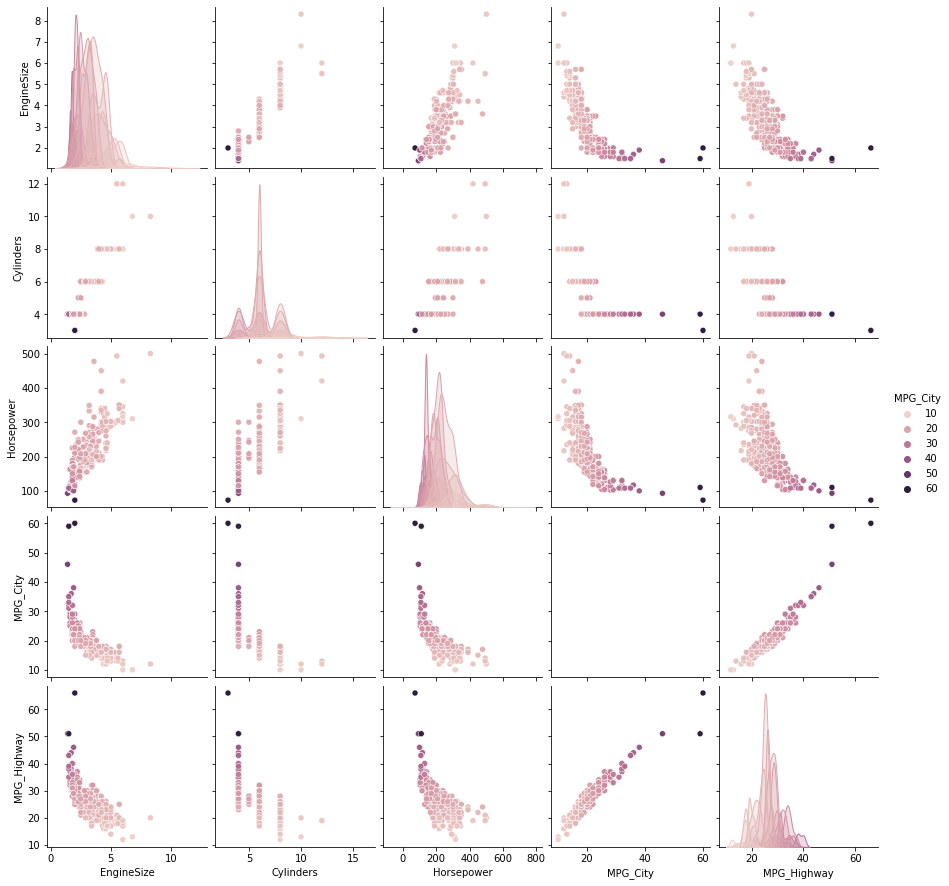

In [31]:
#Draw pairplots toshow correlations
sns.pairplot(cars_num, vars=['EngineSize','Cylinders','Horsepower',	'MPG_City','MPG_Highway'], hue='MPG_City')

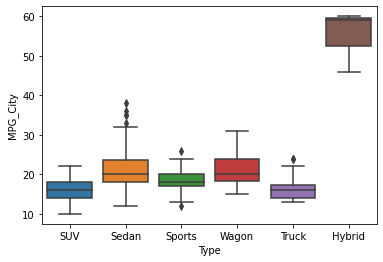

In [32]:
#boxplot can be drawn only for categorical variables 
box1=sns.boxplot(x='Type', y='MPG_City', data=cars)


above plot shows that SUV gives less mileage and Hybrid gives more mileage
Sedan and Wagon show more variation

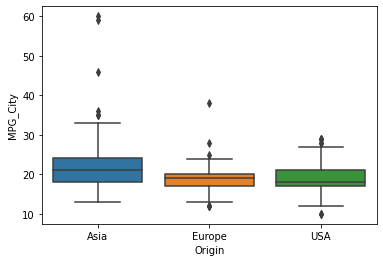

In [33]:
box2=sns.boxplot(x='Origin', y='MPG_City', data=cars)

The origin of car is Asia gives slightly more mileage

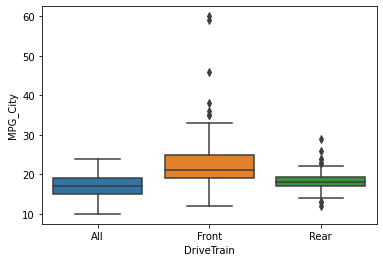

In [34]:
box3=sns.boxplot(x='DriveTrain', y='MPG_City', data=cars)

front DriveTrain is giving more mileage.

Regression plot is useful to show regression line ,if many points are nearer to the line then there is better correlation.
Regression line makes the difference between regression plot and correlation plot.

C:\Python39\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='MPG_City'>

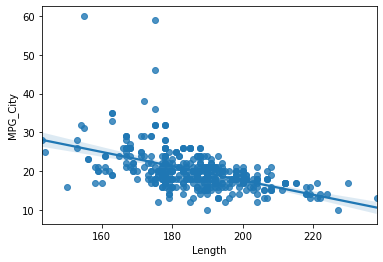

In [35]:
sns.regplot(cars['Length'], cars['MPG_City'])